In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


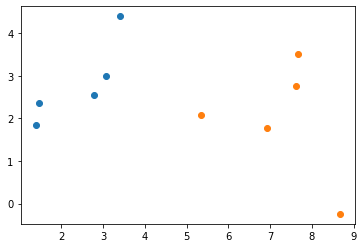

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("05-LogisticRegression.xlsx", usecols=[0, 1, 2], header=3)[:10].astype(np.float64)
plt.scatter(data.X1[:5], data.X2[:5])
plt.scatter(data.X1[5:], data.X2[5:])

## 最急降下法を10epock分行う

In [3]:
alpha = 0.3
epoch = 10
B0 = B1 = B2 = 0

$predict = \frac{1}{1 + e^{-(B_{0} + B_{1} \times X_{1} + B_{2} \times X_{2})}}$

$b = b + alpha \times (y - predict) \times predict \times (1 - predict) \times x$

In [4]:
for e in range(epoch):
    for d in data.itertuples():
        predict = 1 / (1 + np.exp(-(B0 + B1*d.X1 + B2*d.X2)))
        B0 = B0 + alpha * (d.Y - predict) * predict * (1 - predict)
        B1 = B1 + alpha * (d.Y - predict) * predict * (1 - predict) * d.X1
        B2 = B2 + alpha * (d.Y - predict) * predict * (1 - predict) * d.X2

print(str(B0) +"\t"+ str(B1) +"\t"+ str(B2))

-0.4066054639903162	0.8525733163581151	-1.1047462590413433


## 予測した関数を試してみる

In [5]:
predict = 1 / (1 + np.exp(-(B0 + B1*data.X1 + B2*data.X2)))
crisp = np.where(predict < 0.5, 0, 1)
for i in range(len(predict)):
    print(str(predict[i]) +'\t'+ str(crisp[i]))

0.29875698575368714	0
0.14595105598476335	0
0.08533326527883243	0
0.21973731432177582	0
0.2470590002720733	0
0.9547021348596154	1
0.8620341907462735	1
0.9717729051083576	1
0.999295452089986	1
0.9054893230346418	1


## 精度を確かめる

In [6]:
accuracy = (crisp == data.Y).sum() / len(data)
print(str(accuracy * 100) + '%')

100.0%
